In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.2)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

tree_clf_leaf_4 = DecisionTreeClassifier(min_samples_leaf=4)
tree_clf_leaf_4.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(classifier, axes, n_samples=100):
    x0 = np.linspace(axes[0], axes[1], n_samples)
    x1 = np.linspace(axes[2], axes[3], n_samples)
    z0, z1 = np.meshgrid(x0, x1)
    X_new = np.c_[z0.ravel(), z1.ravel()]
    y_pred = classifier.predict(X_new).reshape(z0.shape)
    plt.contourf(z0, z1, y_pred, cmap=plt.cm.rainbow, alpha=0.2)

def plot_dataset(X, y):
    plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'r^')
    plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'bs')
    plt.xlabel('x1')
    plt.ylabel('x2', rotation=True)

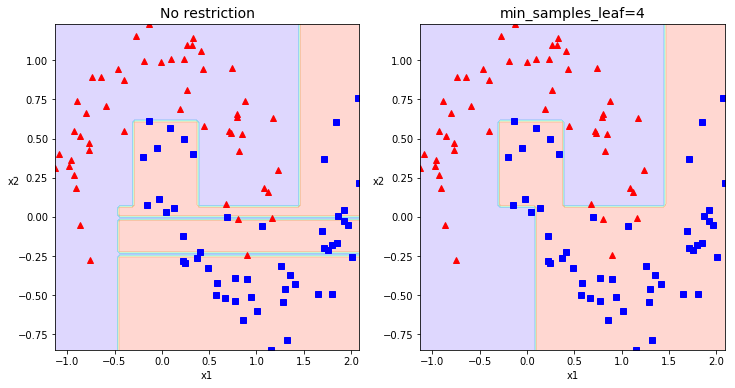

In [3]:
axes = [X[:,0].min(), X[:,0].max(), X[:,1].min(), X[:,1].max()]

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('No restriction', fontsize=14)
plot_decision_boundary(tree_clf, axes)
plot_dataset(X, y)

plt.subplot(122)
plt.title('min_samples_leaf={}'.format(4), fontsize=14)
plot_decision_boundary(tree_clf_leaf_4, axes)
plot_dataset(X, y)